## Inference: GP-ETAS

### Bayesian inference via sampling
Starting the GP-ETAS sampler require a ```gpetas```
*setup_obj* as described above. It contains everything
you need: data, domain definition, setup variables.

Load or generate a *setup_obj* as described above and 
initialize the sampler.

In [1]:
import gpetas
import numpy as np
import datetime
time_format = "%Y-%m-%d %H:%M:%S.%f"


# auto reload using developer version
%load_ext autoreload
%autoreload 2

#### Initialization of the sampler requires a *setup_obj* which includes *data_obj* and *domain_obj*
In this example we load a previously generated *setup_obj*.

In [2]:
case_name = 'Rxxx'
print(case_name)
output_dir = './output/inference_results'
fname = output_dir+'/setup_obj_%s.all'%case_name
setup_obj = np.load(fname,allow_pickle=True)
#vars(setup_obj)

Rxxx


#### Initalization of the sampler

In [3]:
GS = gpetas.Gibbs_sampler.GS_ETAS(data_obj=setup_obj.data_obj, 
        setup_obj=setup_obj, 
        burnin=setup_obj.burnin,
        num_samples=setup_obj.num_iterations, 
        stat_background=False, 
        thinning=setup_obj.thinning,
        kth_sample_obj=setup_obj.kth_sample_obj, 
        case_name=setup_obj.case_name, 
        MH_proposals_offspring=setup_obj.MH_proposals_offspring, 
        MH_cov_empirical_yes=setup_obj.MH_cov_empirical_yes)

UPPER BOUND: lambda_star_start =  0.003394557823129252
INITIALIZATION of theta_tilde (offspring parameters)
     spatial kernel:  Rupture Length Power Law with params: D_RL_pwl, gamma_RL_pwl, q_RL_pwl
[K, c, p, m_alpha, D_RL_pwl, gamma_RL_pwl, q_RL_pwl, m_beta, m0]
[2.5000000e-03 1.0000000e-02 1.2000000e+00 1.8000000e+00 5.0000000e-02
 5.0000000e-01 2.0000000e+00 2.3977128e+00 3.5000000e+00]
START: hyper prior: self.prior_mu_upper_bound  = [0.17222638]
START: self.alpha0                             = 1.0
START: self.beta0                              = [5.80631154]
START: self.prior_std_factor_upper_bound       = 1.0


In [4]:
# some info to the screen
import pprint
print('---------------------------------------')
print('case name                =',setup_obj.case_name)
print('---------------------------------------')
print('domain from data_obj')
pprint.pprint(vars(setup_obj.data_obj.__dict__['domain']))
print('---------------------------------------')
print('burnin                   = ',setup_obj.burnin)
print('Ksamples                 = ',setup_obj.Ksamples)
print('thinning                 = ',setup_obj.thinning)
print('Ntotal iter              = ',setup_obj.num_iterations)
print('MH_proposals_offspring   = ',setup_obj.MH_proposals_offspring)
print('MH_cov_empirical_yes     = ',setup_obj.MH_cov_empirical_yes)
print('kth_sample_obj           = ',setup_obj.kth_sample_obj)
print('---------------------------------------')
print('theta prior:                           ')
print('prior_theta_dist         =',setup_obj.prior_theta_dist)
print('prior_theta_params       =',setup_obj.prior_theta_params)
print('stable_theta_sampling    =',setup_obj.stable_theta_sampling)

---------------------------------------
case name                = Rxxx
---------------------------------------
domain from data_obj
{'T_borders_all': array([   0., 4383.]),
 'T_borders_testing': array([3000., 4383.]),
 'T_borders_training': array([   0., 3000.]),
 'X_borders': array([[-120., -113.],
       [  30.,   37.]]),
 'X_borders_UTM_km': None,
 'X_borders_original': array([[-120., -113.],
       [  30.,   37.]]),
 'm0': 3.5,
 'time_origin': '2010-01-01 00:00:00.000000'}
---------------------------------------
burnin                   =  100
Ksamples                 =  100
thinning                 =  10
Ntotal iter              =  1001
MH_proposals_offspring   =  100
MH_cov_empirical_yes     =  None
kth_sample_obj           =  None
---------------------------------------
theta prior:                           
prior_theta_dist         = gamma
prior_theta_params       = None
stable_theta_sampling    = yes


#### Start sampler

In [ ]:
GS.sample()

sigma proposal log units = 0.01 Nproposals= 100


#### Plot summary
You can directly plot a summary of the Bayesian inference or 
you can first do MLE and plot subsequently a summary with comparison

from orig. data_obj |T_training| [3000.] |X| 49.0
testing periods
[[   0. 3000.]
 [3000. 4383.]] days.
Number of employed posterior samples: 10
Current T_star_testing = [   0. 3000.]
Employed number of posterior samples: 10
Current T_star_testing = [3000. 4383.]
Employed number of posterior samples: 10
gpetas: [-345.89229143 2299.6937258 ]


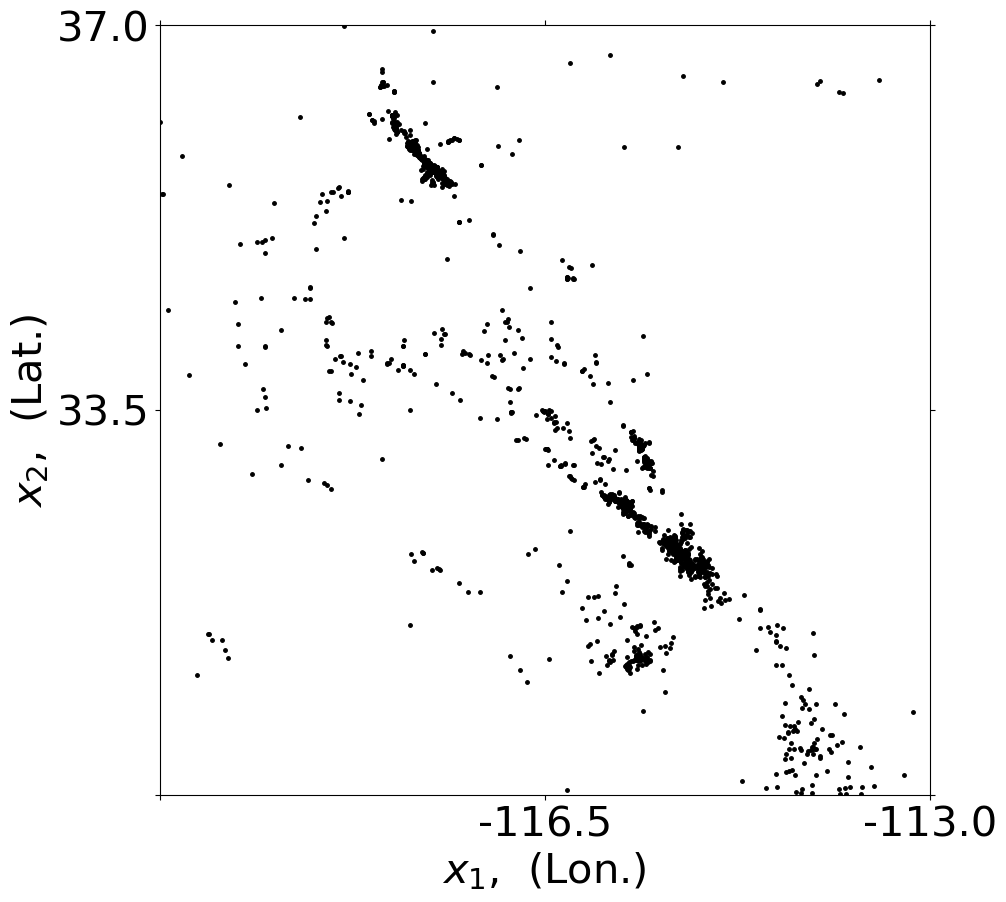

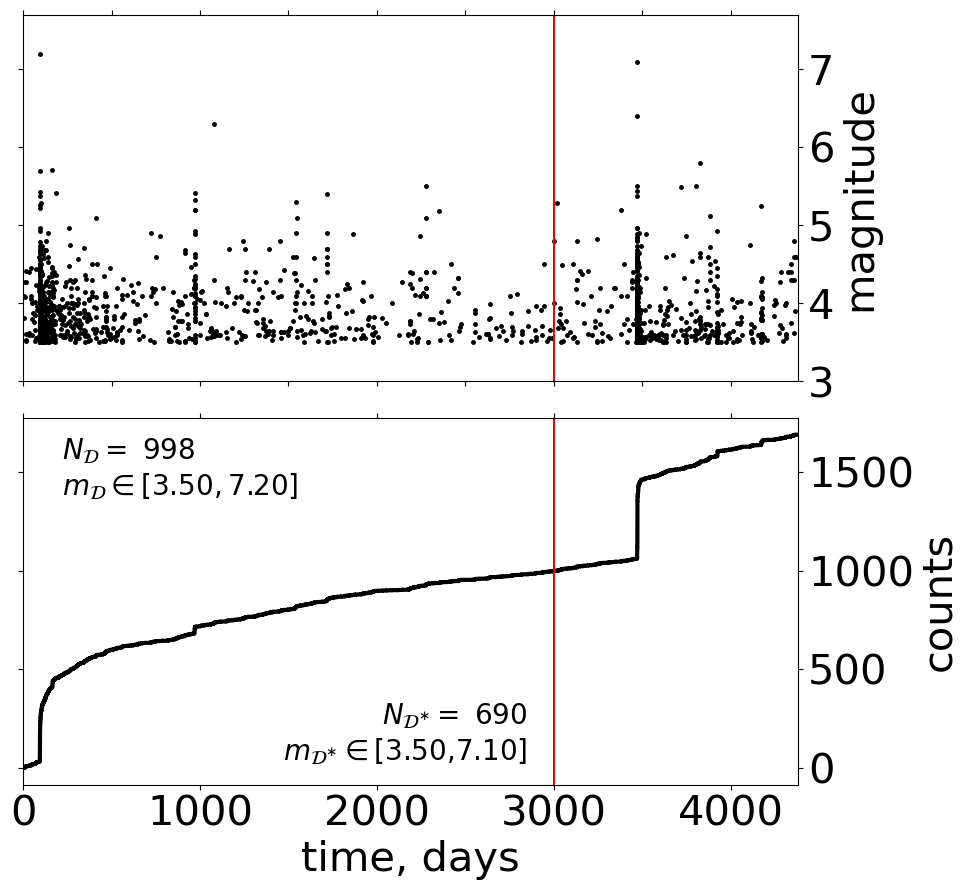

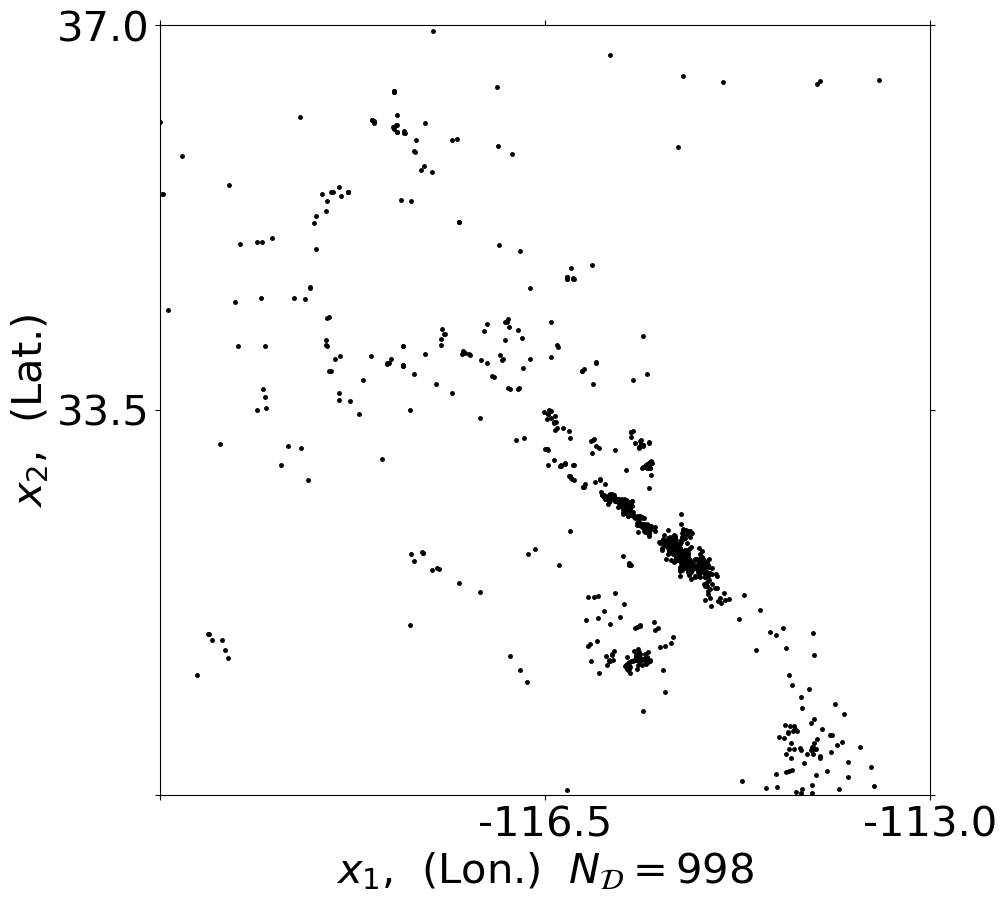

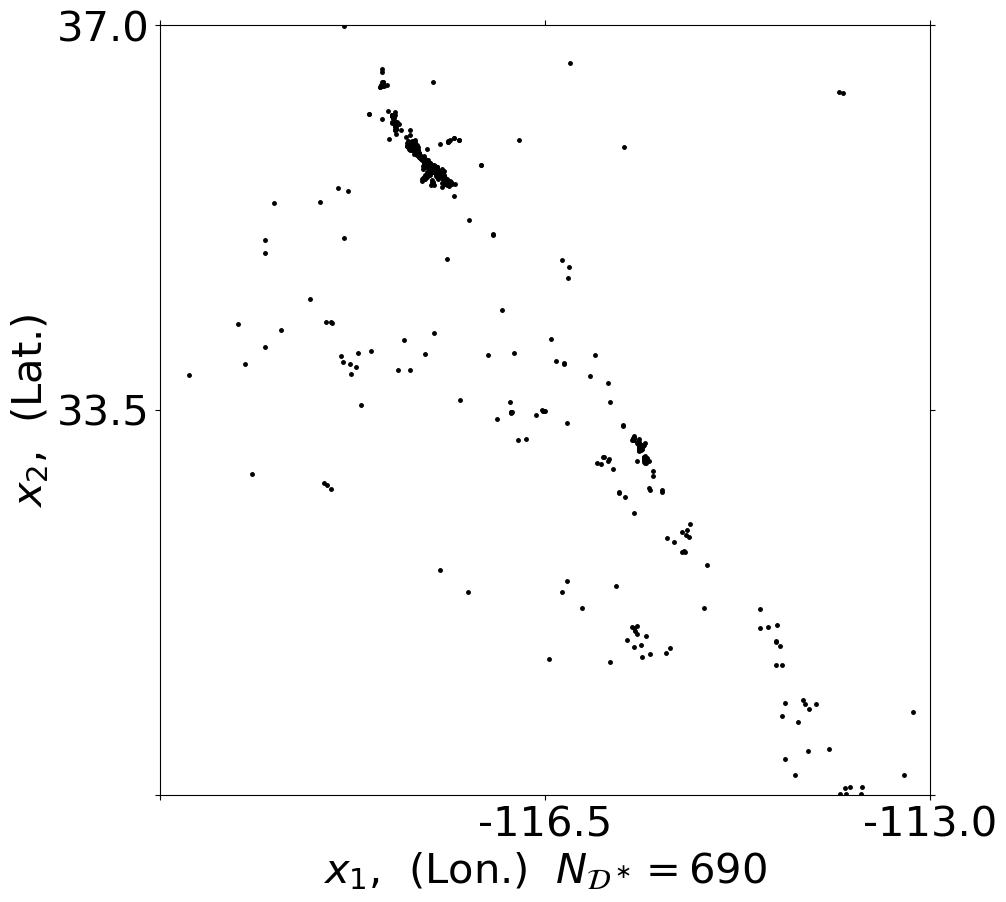

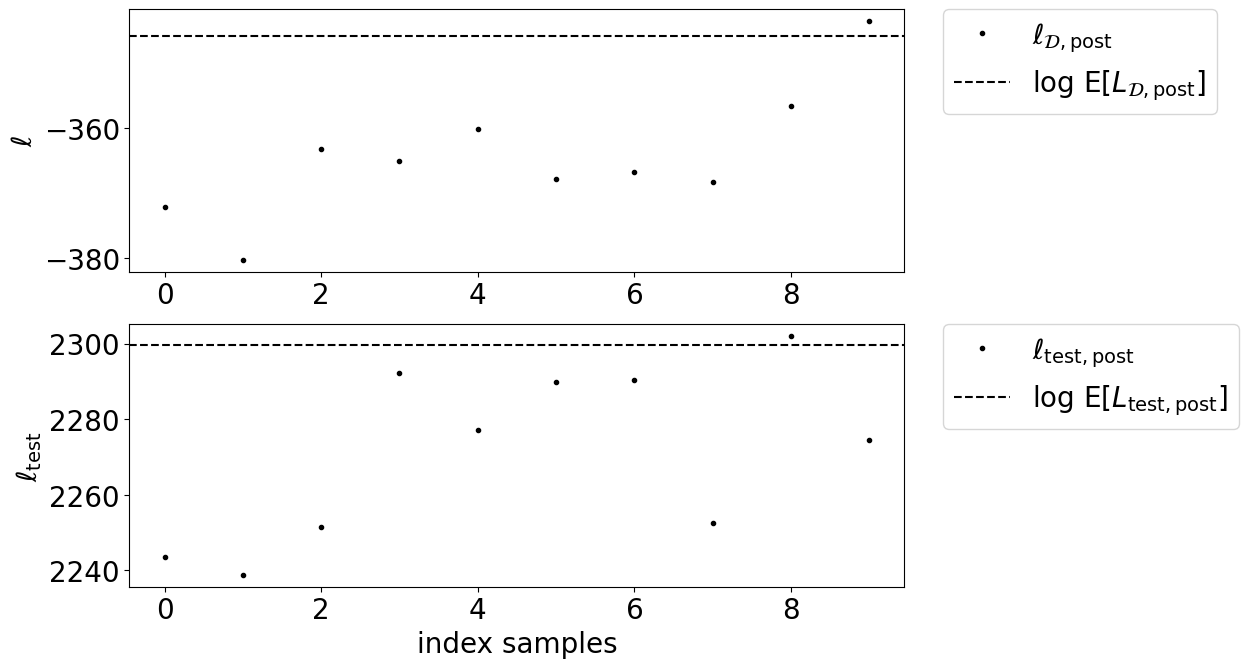

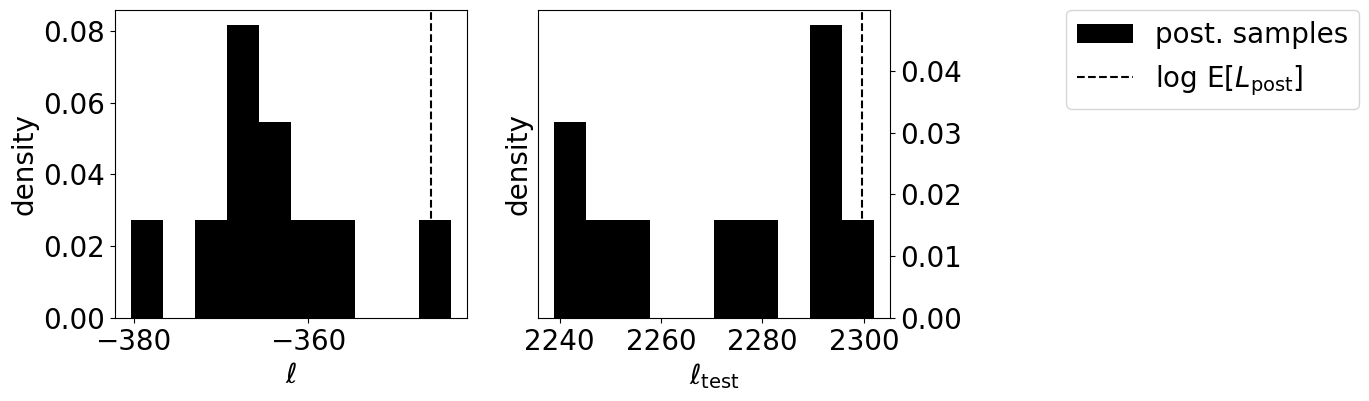

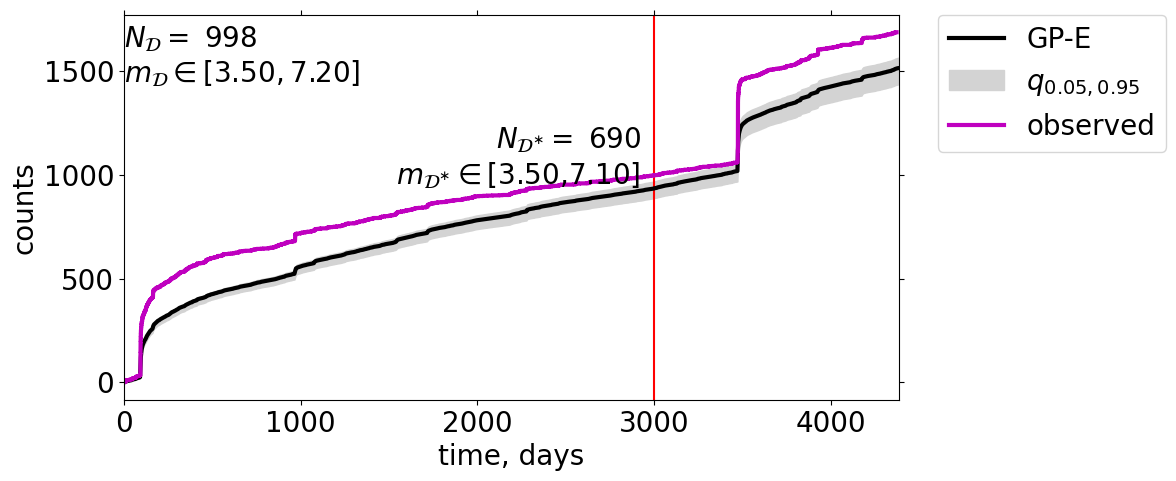

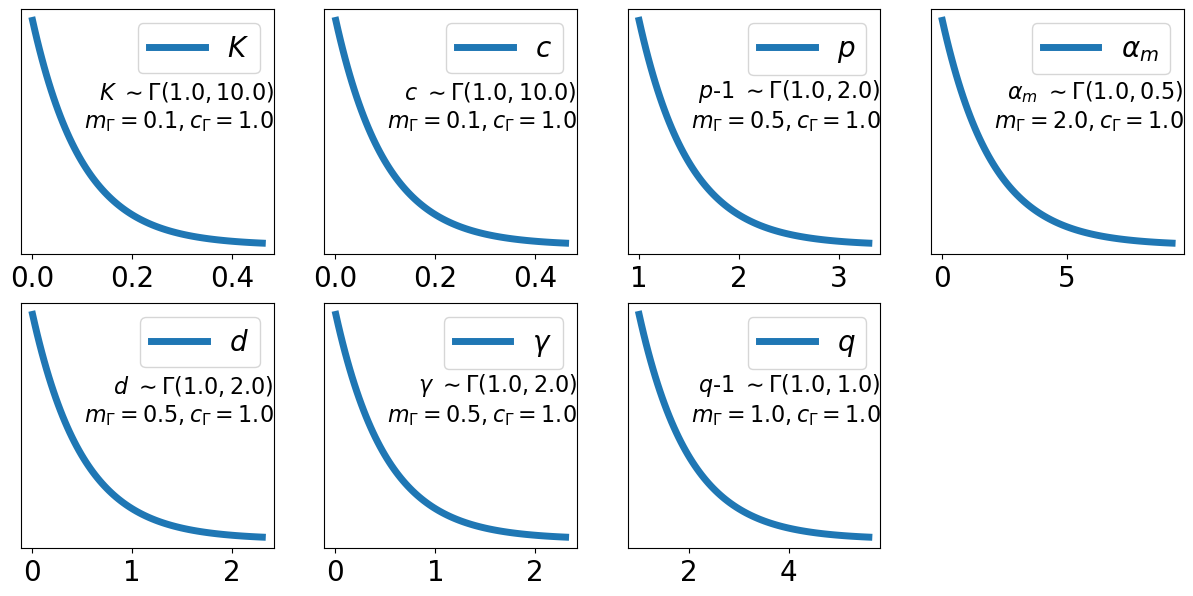

In [6]:
save_GS_obj = GS.save_data
gpetas.summary.summary_gpetas(save_GS_obj)